# Analysis robustness of PLIER models based on GTEx using different parameters

Marc Subirana-Granés (2024)

Compare the various parameters of PLIER GTEx models across different computations to evaluate PLIER's robustness, utilizing differentparameters for assessment.

## Load libraries and data

In [3]:
suppressPackageStartupMessages({
    
    library(dplyr)
    library(tidyr)
    library(UpSetR)
    library(ggplot2)
    library(ComplexHeatmap)
    library(reshape2)
    library(corrr)
    library(assertthat)

    
})

#load functions
source(here::here('scripts/plier_util.R'))

# move functions to a Rscript?
check_all_equal_in_list <- function(lst) {
  # Check if all values in the list are equal
  all_equal <- all(sapply(lst, function(x) identical(x, lst[[1]])))
  
  # Print message based on the result
  if (all_equal) {
    print("All values in the list are equal.")
  } else {
    print("Values in the list are not all equal.")
  }
  
}
INPUT_PLIER_ROB_DIR='output/gtex'
assert_that(!is.null(INPUT_PLIER_ROB_DIR), msg = "Input robustness PLIER models path was not specified")
INPUT_PLIER_ROB_DIR=here::here(INPUT_PLIER_ROB_DIR)

[1] TRUE

In [4]:
gtex_rob_model_paths=list.files(INPUT_PLIER_ROB_DIR,
                                pattern="\\.rds",
                                full.names=TRUE)

# All models into a list
# gtex_rob_models=lapply(gtex_rob_model_paths, readRDS)

In [5]:
gtex_rob_model_paths=gtex_rob_model_paths[startsWith(basename(gtex_rob_model_paths),'plier_result')]

In [301]:
gtex_tmp_1=readRDS(gtex_rob_model_paths[1])
gtex_tmp_7=readRDS(gtex_rob_model_paths[7])

In [ ]:
gtex_tmp_1$B

In [318]:
any(is.infinite(subset_data_z_t))
any(is.nan(subset_data_z_t))
any(is.na(subset_data_z_t))


ERROR: Error in is.infinite(subset_data_z_t): default method not implemented for type 'list'


In [313]:
library(reticulate)

# Define the folder where you want to save the pickle files
save_directory <- '/home/msubirana/Documents/pivlab/plier_recount3/nbs/10_gtex/prove_plk'

# Check if the directory exists, create if it does not
if (!dir.exists(save_directory)) {
  dir.create(save_directory, recursive = TRUE)
}

# Function to save any R object as a pickle file in the specified directory
save_as_pickle <- function(object, filename) {
  full_path <- file.path(save_directory, filename)
  py_save_object(r_to_py(object), full_path)
}

# Assuming gtex_tmp_1 is a list with various data types
names_list <- names(gtex_tmp_1)

for (name in names_list) {
  element <- gtex_tmp_1[[name]]
  if (is.matrix(element) || is.array(element)) {
    # Convert matrices/arrays to data frames before saving
    df <- as.data.frame(element)
    save_as_pickle(df, paste0(name, ".pkl"))
  } else {
    # Save other data types directly
    save_as_pickle(element, paste0(name, ".pkl"))
  }
}


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(e

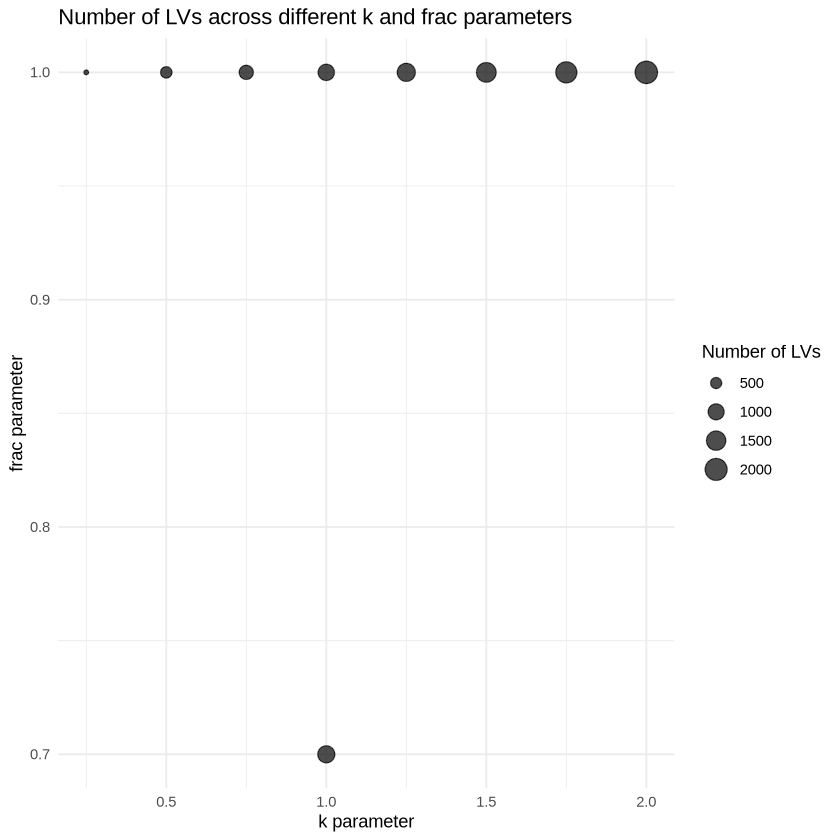

In [5]:
library(ggplot2)
library(stringr)


# Initialize a data frame to hold the file name, k value, frac value, and number of columns
results_df <- data.frame(file = character(), k = numeric(), frac = numeric(), ncol = integer(), stringsAsFactors = FALSE)

# Loop over the file paths to extract parameters and number of columns
for (file_path in gtex_rob_model_paths) {
  # Extract the k and frac values from the file name using regular expressions
  k_match <- str_extract(basename(file_path), "(?<=_k)[0-9.]+")
  frac_match <- str_extract(basename(file_path), "(?<=_frac)[0-9.]+")
  
  # Check if either k or frac are NA (or empty) and print a message if they are
  if (is.na(k_match) || is.na(frac_match) || k_match == "" || frac_match == "") {
    message("Could not extract parameters from filename: ", basename(file_path))
    next # Skip to the next file
  }
  
  # Convert the extracted values to numeric
  k_value <- as.numeric(k_match)
  frac_value <- as.numeric(frac_match)
  
  # Read the RDS file
  data <- readRDS(file_path)
  
  # Get the number of columns from the data
  num_cols <- ncol(data$Z)
  
  # Combine this info into our results data frame
  results_df <- rbind(results_df, data.frame(file = basename(file_path), k = k_value, frac = frac_value, ncol = num_cols))
}

# Proceed with your plot if results_df is not empty
if (nrow(results_df) > 0) {
  ggplot_object <- ggplot(results_df, aes(x = k, y = frac, size = ncol)) +
    geom_point(alpha = 0.7) +
    scale_size(name = "Number of LVs") +
    labs(x = "k parameter", y = "frac parameter", title = "Number of LVs across different k and frac parameters") +
    theme_minimal()

  # Print the plot
  print(ggplot_object)
} else {
  message("No data to plot.")
}


In [6]:
gtex_rob_model_paths

[1] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.25_frac0.25.rds"  
 [2] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.25_frac0.5.rds"   
 [3] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.25_frac0.7.rds"   
 [4] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.25_frac1.rds"     
 [5] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.5_frac0.25.rds"   
 [6] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.5_frac0.5.rds"    
 [7] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.5_frac0.7.rds"    
 [8] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.5_frac1.rds"      
 [9] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.75_frac0.25.rds"  
[10] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.75_frac0.5.rds"   
[11] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.75_frac0.7.rds"   
[12] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k0.75_frac1.rds"     
[13] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1_frac0.25.rds"     
[14] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1_frac0.5.rds"      
[15] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1_frac0.7_chr21.rds"
[16] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1_frac0.7.rds"      
[17] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1_frac1.rds"        
[18] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.25_frac0.25.rds"  
[19] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.25_frac0.5.rds"   
[20] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.25_frac0.7.rds"   
[21] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.25_frac1.rds"     
[22] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.5_frac0.25.rds"   
[23] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.5_frac0.5.rds"    
[24] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.5_frac0.7.rds"    
[25] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.5_frac1.rds"      
[26] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.75_frac0.25.rds"  
[27] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.75_frac0.5.rds"   
[28] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.75_frac0.7.rds"   
[29] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k1.75_frac1.rds"     
[30] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k2_frac0.25.rds"     
[31] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k2_frac0.5.rds"      
[32] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k2_frac0.7.rds"      
[33] "/home/msubirana/Documents/pivlab/plier_recount3/output/gtex/plier_result_k2_frac1.rds"

In [7]:
library(ggplot2)
library(dplyr)

# Initialize an empty data frame
results_df <- data.frame(file = character(), k = numeric(), frac = numeric(), ncol = integer(), stringsAsFactors = FALSE)

# Define the function to extract k and frac values from filenames
extract_params <- function(filename) {
  
  k=as.numeric(gsub('k', '', unlist(strsplit(basename(filename), '_'))[3]))
  frac=as.numeric(gsub('.rds', '', gsub('frac', '', unlist(strsplit(basename(filename), '_'))[4])))
  return(c(k = k, frac = frac))
    
}

# Loop through each file path
for (file_path in gtex_rob_model_paths) {
  # Attempt to read the RDS file
  data <- readRDS(file_path)
  
  # Check for the existence of data$Z
  if (!"Z" %in% names(data)) {
    message(paste("Warning: 'Z' is not found in the data from file:", file_path))
    next
  }
  
  # Extract the parameters from the filename
  params <- extract_params(basename(file_path))
  
  # If params is NULL, skip this iteration
  if (is.null(params)) next
  
  # Bind the results to the results_df
  results_df <- rbind(results_df, data.frame(file = basename(file_path), k = params['k'], frac = params['frac'], ncol = ncol(data$Z)))
}

# Check if results_df is empty before proceeding to plot
if (nrow(results_df) == 0) {
  stop("No data extracted. Check your file names and content.")
}

# Rest of the plotting code remains the same


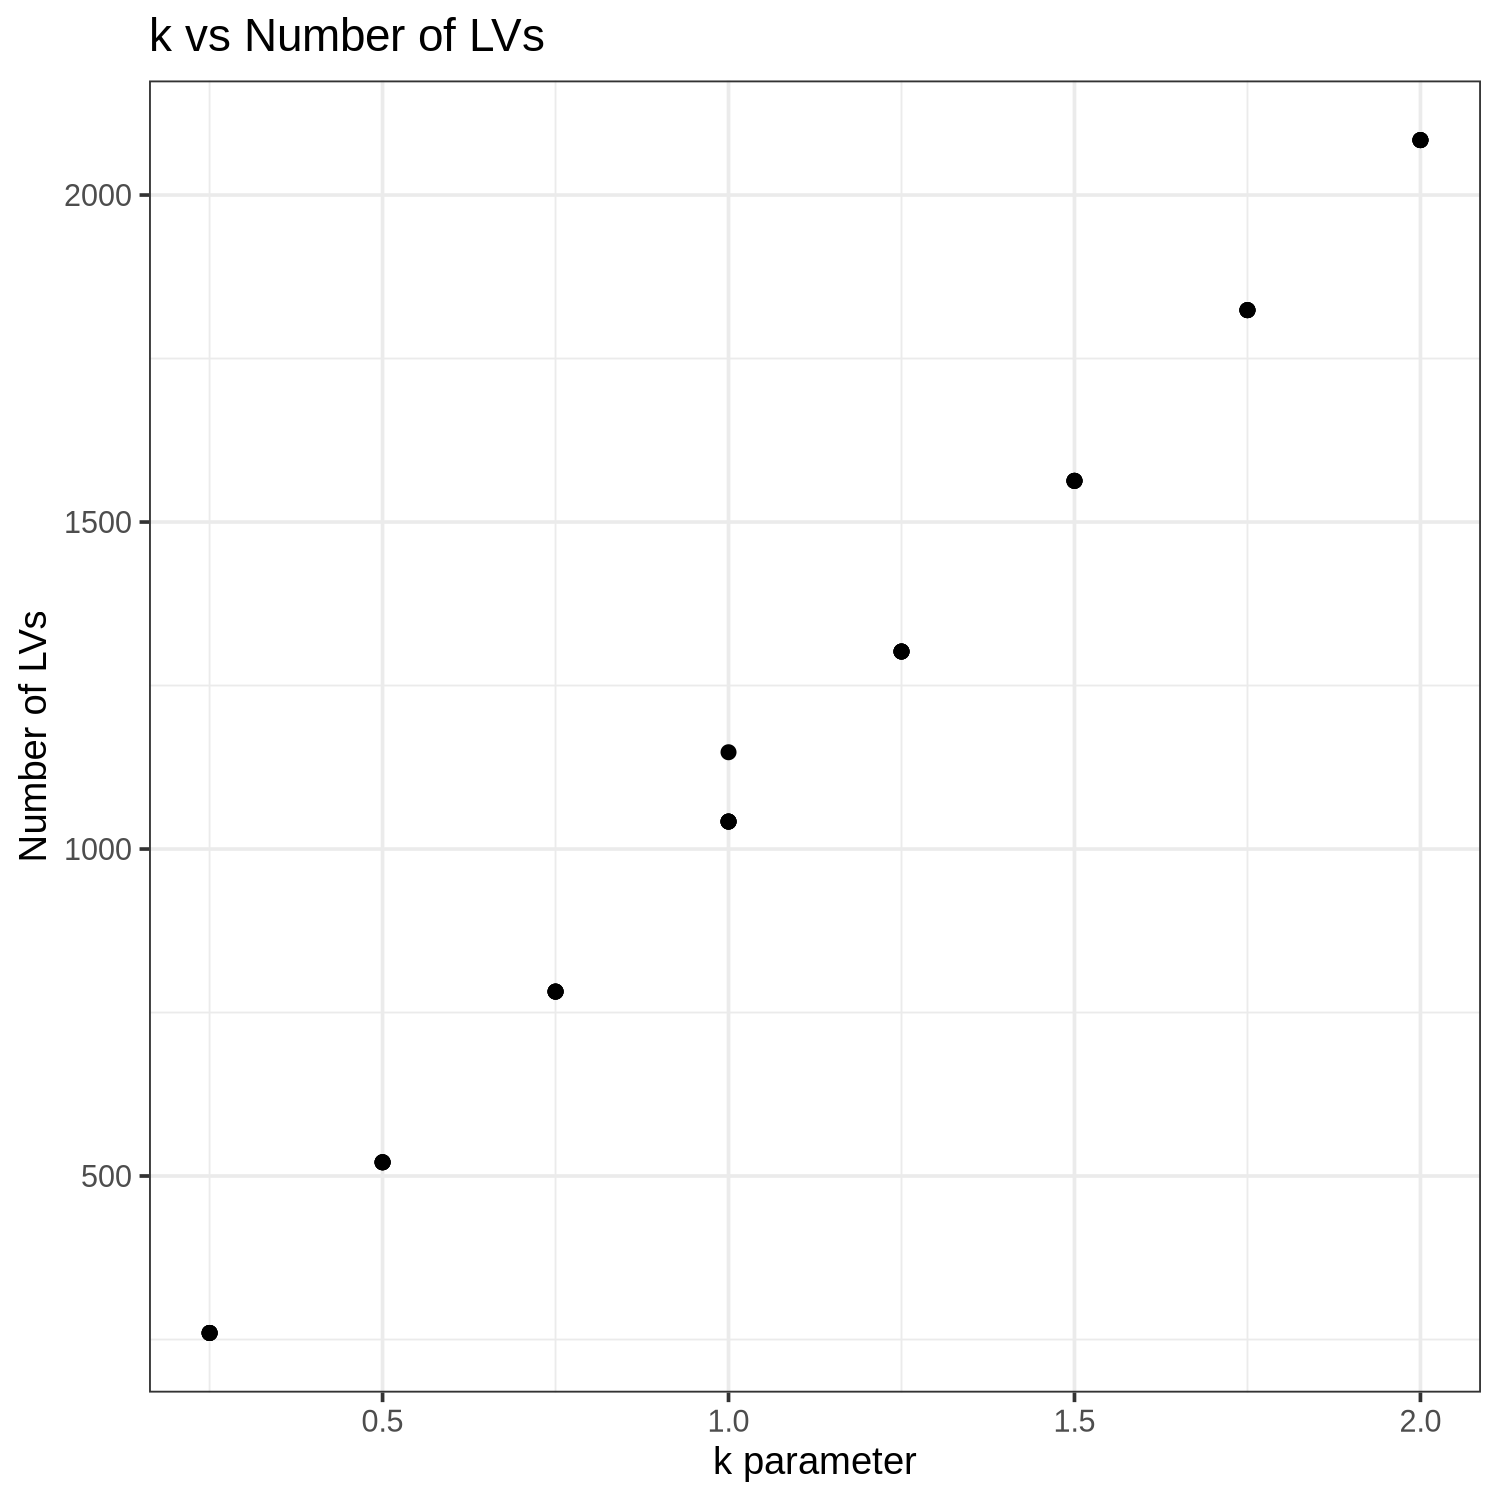

In [8]:
# Scatter plot for k vs LVs
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 250)

ggplot(results_df, aes(x = k, y = ncol)) +
  geom_point() +
  labs(x = "k parameter", y = "Number of LVs", title = "k vs Number of LVs") +
  theme_bw()

In [9]:
# Bar plot for combined k and frac vs LVs
ggplot(results_df, aes(x = k, y = ncol, fill=k_frac)) +
  geom_bar(stat = "identity") +
  labs(x = "k and frac combination", y = "Number of LVs", title = "Number of LVs by k and frac combination") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  theme_bw()

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'k_frac' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)


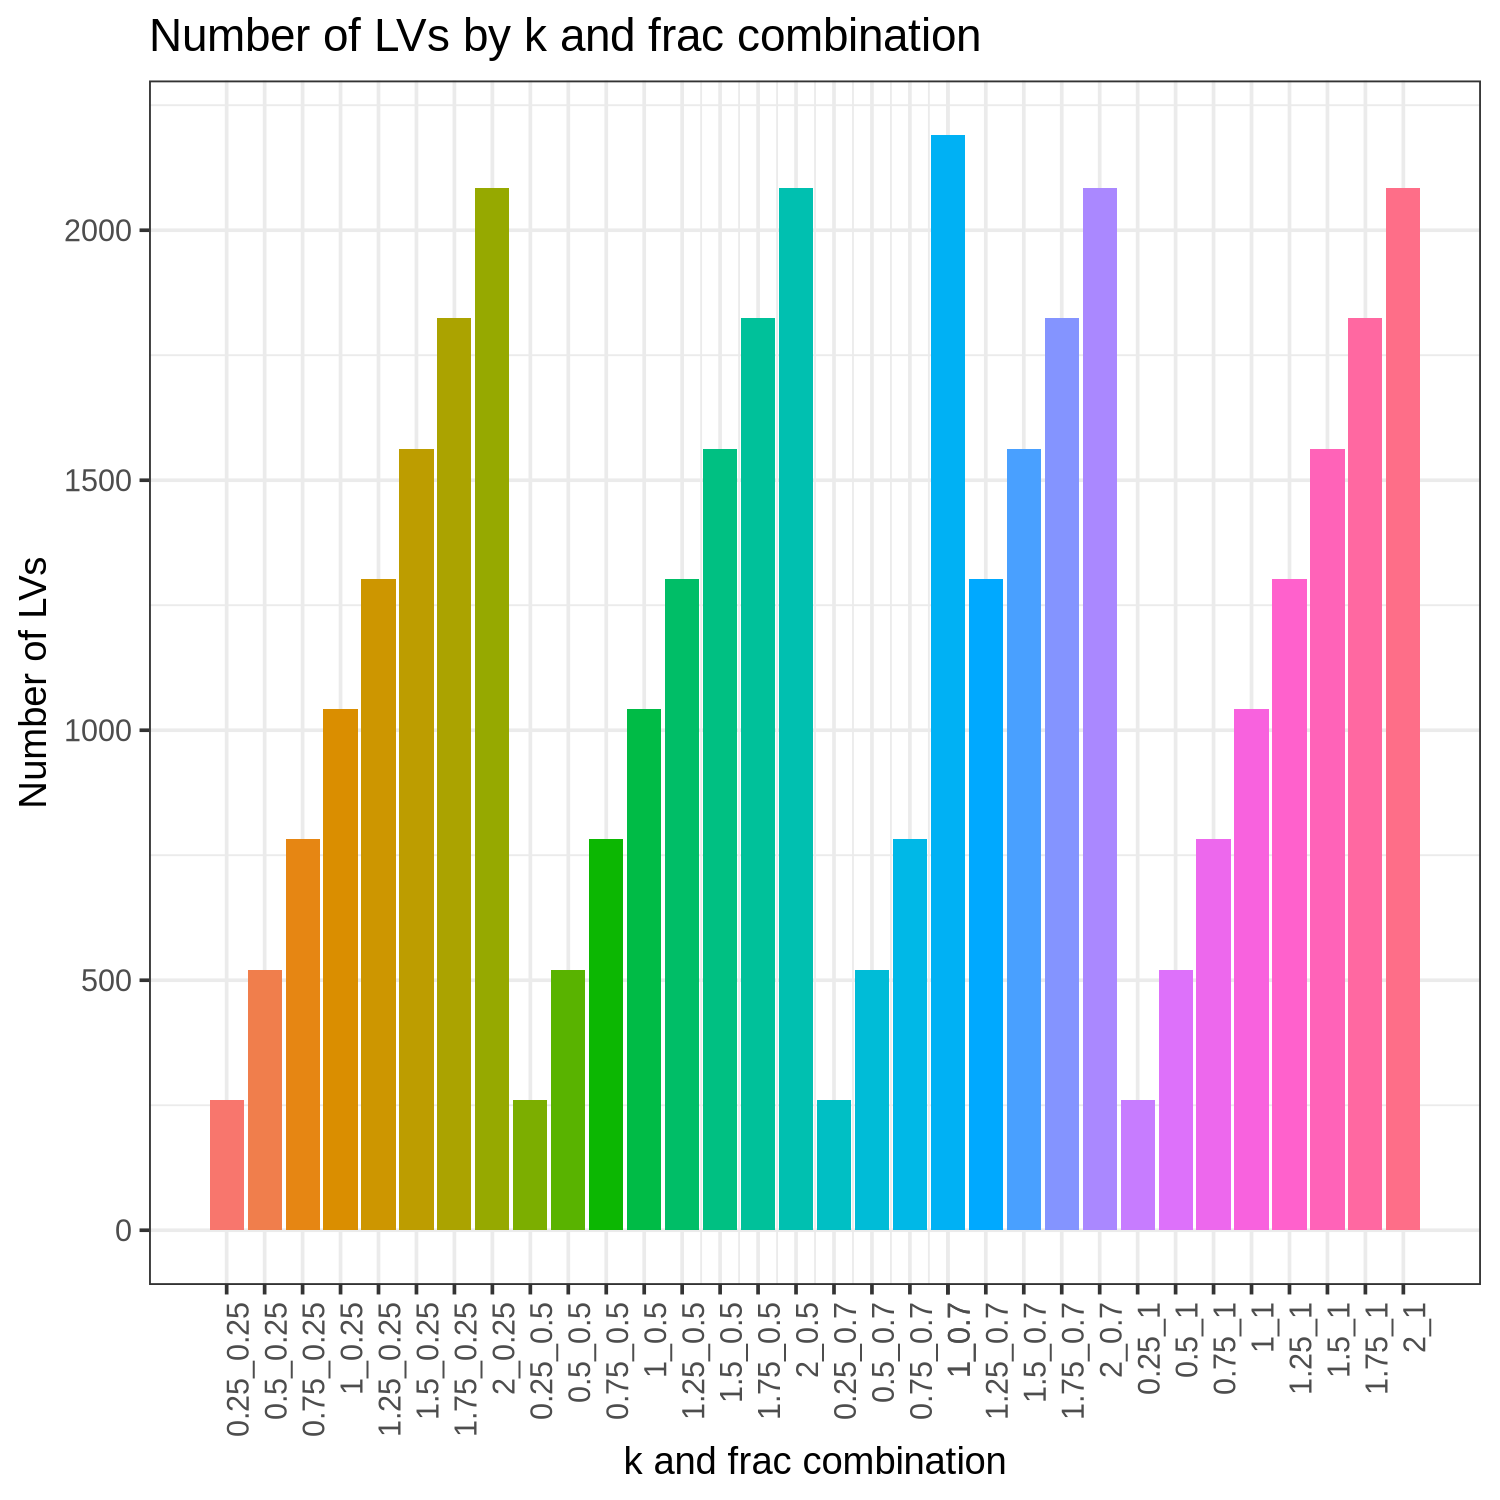

In [10]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 250)

# Ensure results_df is sorted by k and frac to make the line plot correctly
results_df <- results_df %>%
  arrange(k, frac) %>%
  mutate(k_frac = interaction(k, frac, sep = "_"))

# Add an identifier for the order of the k_frac groups
results_df$k_frac_id <- as.numeric(as.factor(results_df$k_frac))

# Bar plot with a line showing the trend of ncol
ggplot(results_df, aes(x = k_frac_id, y = ncol, group = 1)) +
  geom_bar(stat = "identity", aes(fill = k_frac), show.legend = FALSE) +
  scale_x_continuous(breaks = results_df$k_frac_id, labels = results_df$k_frac) +
  labs(x = "k and frac combination", y = "Number of LVs", title = "Number of LVs by k and frac combination") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 


In [6]:
tmp_gtex1=readRDS(gtex_rob_model_paths[1])
tmp_gtex2=readRDS(gtex_rob_model_paths[7])

In [8]:
class(tmp_gtex2$Z)

[1] "matrix" "array"

In [5]:
head(tmp_gtex1$Z)

[,1]         [,2]        [,3]       [,4]        [,5]      [,6]      
GAS6     0.0000000000 0.009787693 0.00000000 0.060301397 0.1721544 0.02922771
MMP14    0.0000000000 0.000000000 0.03782301 0.007829730 0.0000000 0.00000000
MARCKSL1 0.0000000000 0.000000000 0.00000000 0.000000000 0.0000000 0.00000000
SPARC    0.0007030867 0.000000000 0.08105137 0.004457913 0.1666757 0.00000000
CTSD     0.0000000000 0.000000000 0.01141691 0.000000000 0.0000000 0.00000000
EPAS1    0.0000000000 0.000000000 0.00000000 0.000000000 0.1755276 0.02172609
         [,7]        [,8]        [,9]      [,10]      [,11] [,12]     
GAS6     1.122494052 0.001757722 0.0000000 0.00000000 ⋯     0.17133690
MMP14    0.524503509 0.001713774 0.0000000 0.00000000 ⋯     0.25550811
MARCKSL1 0.000000000 0.000000000 0.1029763 0.03222474 ⋯     0.00000000
SPARC    0.000000000 0.000000000 0.0000000 0.00000000 ⋯     0.00000000
CTSD     0.004572067 0.207036617 0.0000000 0.05700289 ⋯     0.21812402
EPAS1    0.031795187 0.000000000 0.0246234 0.00000000 ⋯     0.07267281
         [,13]      [,14]       [,15]      [,16]      [,17]      [,18]     
GAS6     0.00000000 0.000000000 0.00000000 0.00000000 0.00000000 0.00000000
MMP14    0.00000000 0.000000000 0.02447285 0.00000000 0.00000000 0.00000000
MARCKSL1 0.00000000 0.003903516 0.11233175 0.07098903 0.00000000 0.00000000
SPARC    0.58763183 0.000000000 0.00000000 0.00000000 0.09634903 0.03717902
CTSD     0.03053878 0.000000000 0.00000000 0.18000041 0.00000000 0.00000000
EPAS1    0.18190944 0.007653116 0.00000000 0.00000000 0.57485846 1.78335445
         [,19]  [,20]      [,21]     
GAS6     0.0000 0.05034305 0.06261871
MMP14    0.0000 0.00000000 0.13676877
MARCKSL1 0.0000 0.00000000 0.00000000
SPARC    0.0000 0.00000000 0.00000000
CTSD     0.0000 0.00000000 0.07292516
EPAS1    1.4145 0.16857196 0.00000000

In [19]:
tmp_gtex1_Z=tmp_gtex1$Z
sub_tmp_gtex1_Z=head(tmp_gtex1_Z, 100)

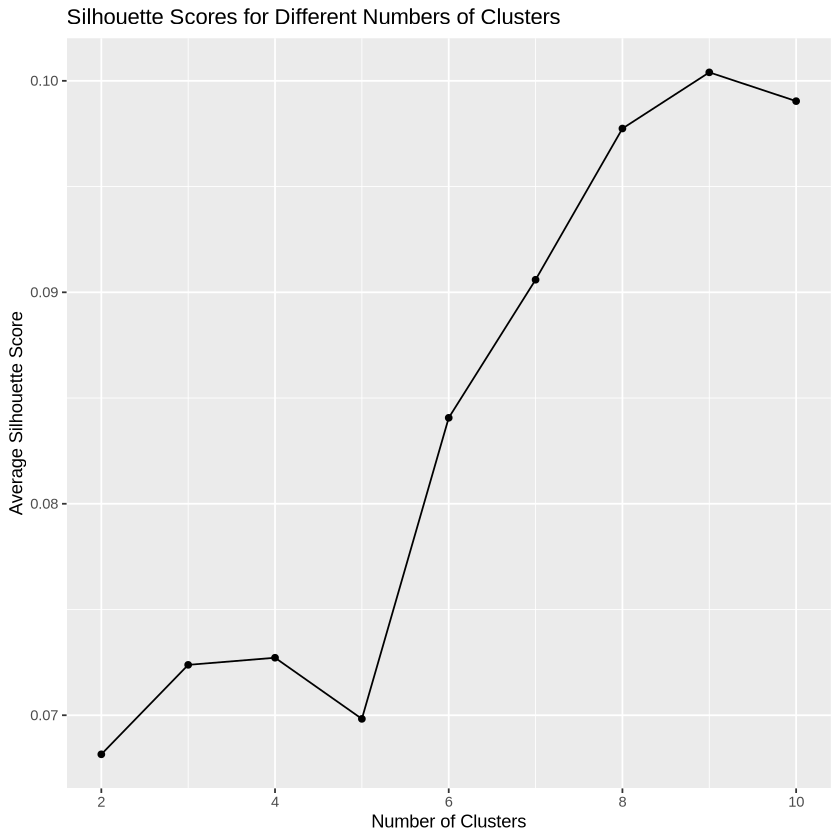

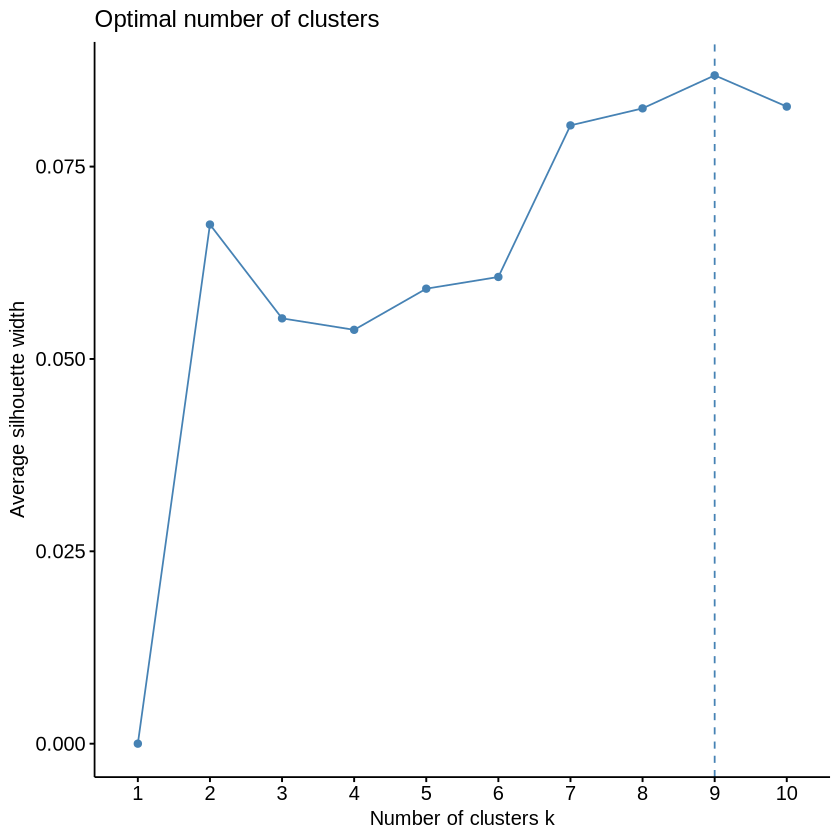

In [21]:
library(cluster)
library(factoextra)

# Assuming 'normalized_data' is your dataset

# Function to compute average silhouette for a range of clusters
compute_silhouette <- function(data, max_clusters) {
  silhouette_scores <- data.frame(
    k = integer(),
    silhouette_width = double()
  )
  
  for (k in 2:max_clusters) {
    km <- kmeans(data, centers = k, nstart = 25)
    sil <- silhouette(km$cluster, dist(data))
    average_sil <- mean(sil[, "sil_width"])
    silhouette_scores <- rbind(silhouette_scores, data.frame(k = k, silhouette_width = average_sil))
  }
  
  return(silhouette_scores)
}

# Use this function to calculate silhouette scores for a range of cluster numbers
sil_scores <- compute_silhouette(sub_tmp_gtex1_Z, 10)  # Checking up to 10 clusters

# Plotting silhouette scores to find the optimal number of clusters
library(ggplot2)
ggplot(sil_scores, aes(x = k, y = silhouette_width)) +
  geom_line() +
  geom_point() +
  labs(title = "Silhouette Scores for Different Numbers of Clusters",
       x = "Number of Clusters",
       y = "Average Silhouette Score")

# Visualizing using fviz_nbclust (factoextra package) also
fviz_nbclust(sub_tmp_gtex1_Z, kmeans, method = "silhouette")


ERROR: Error: object 'combined_df' not found


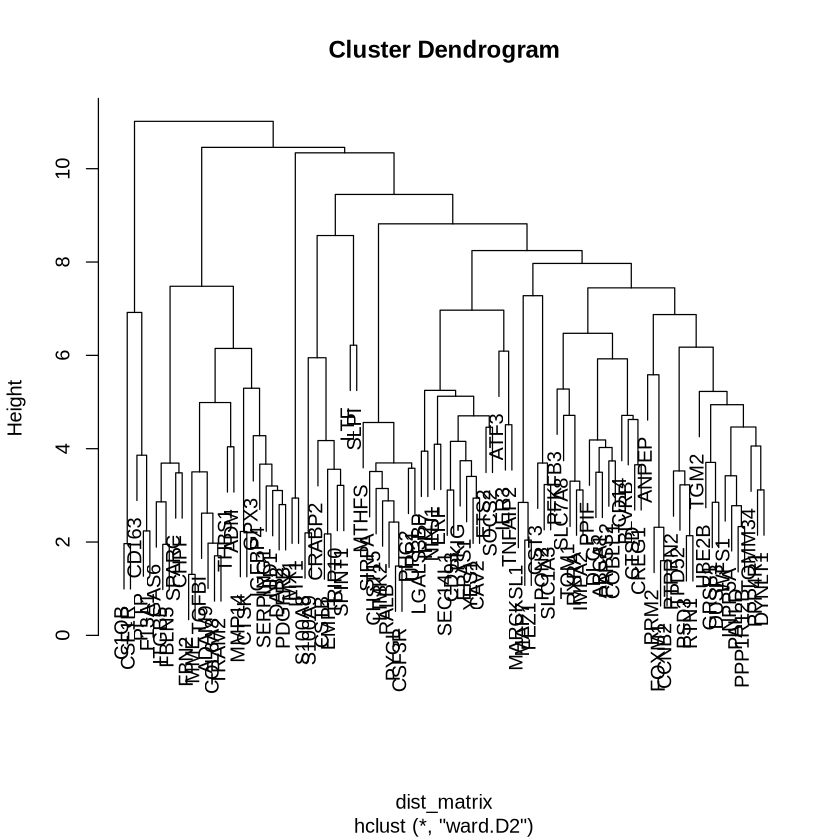

In [24]:
# Compute distance matrix
dist_matrix <- dist(sub_tmp_gtex1_Z)

# Perform hierarchical clustering
hc <- hclust(dist_matrix, method = "ward.D2")

# Plot dendrogram
plot(hc)

# Cutting the tree at the desired number of clusters
clusters <- cutree(hc, k = 9) # Adjust 'k' based on your dendrogram

# Adding cluster information back to the data frame
combined_df$Cluster <- as.factor(clusters)


In [25]:
# Assuming 'sub_tmp_gtex1_Z' is already loaded and is your data matrix
set.seed(123)  # Set seed for reproducibility

# Perform k-means clustering on transposed data
kmeans_result <- kmeans(t(sub_tmp_gtex1_Z), centers = 5)

# Plotting the clusters
library(cluster)
clusplot(t(sub_tmp_gtex1_Z), kmeans_result$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)


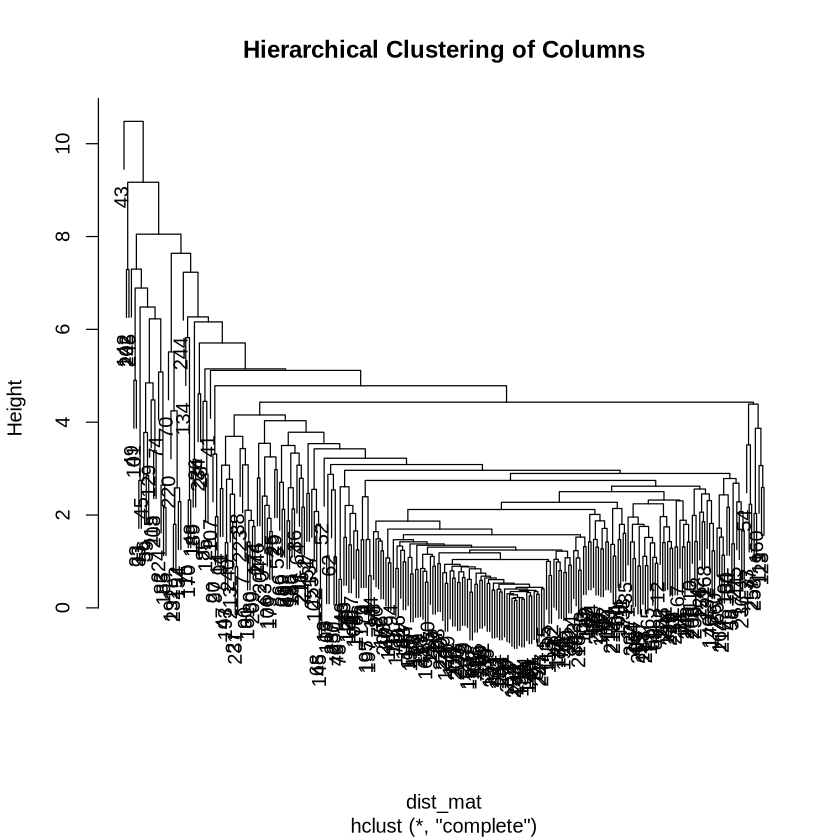

In [26]:
# Calculate the distance matrix
dist_mat <- dist(t(sub_tmp_gtex1_Z))

# Perform hierarchical clustering
hc_result <- hclust(dist_mat)

# Plot the dendrogram
plot(hc_result, main = "Hierarchical Clustering of Columns")

# Cutting tree to form clusters
clusters <- cutree(hc_result, k = 5)



  0   1 
229  31 

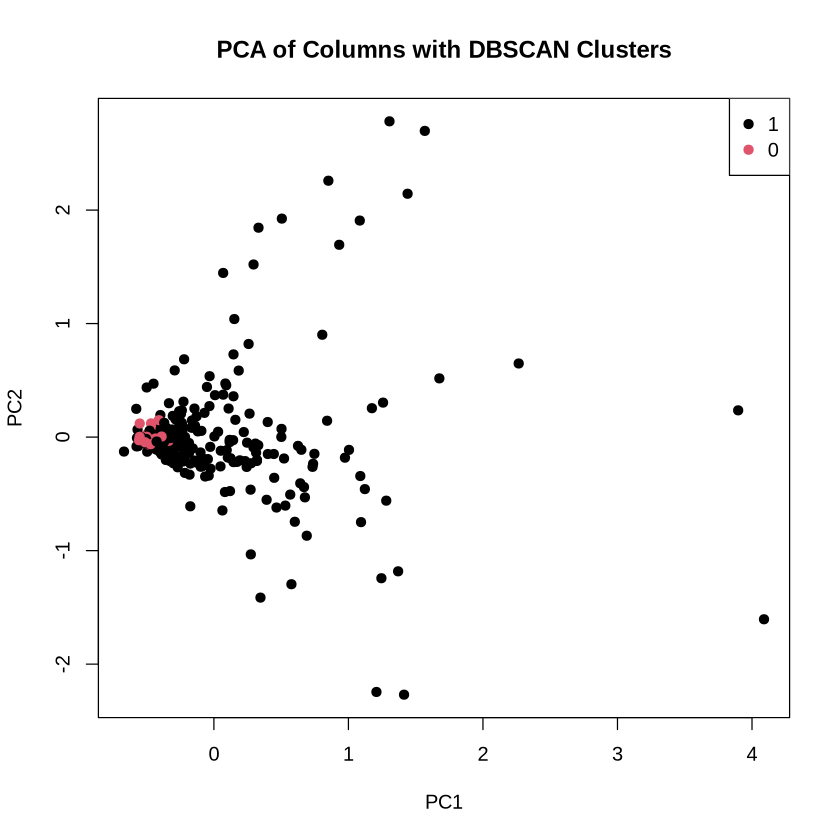

In [30]:
# Install and load the dbscan package if not already installed
if (!requireNamespace("dbscan", quietly = TRUE)) {
    install.packages("dbscan")
}
library(dbscan)

# Perform DBSCAN clustering
dbscan_result <- dbscan(dist_mat, eps = 0.5, minPts = 10)  # adjust eps and minPts based on your data

# Viewing the cluster results
table(dbscan_result$cluster)

# Perform PCA on transposed data
pca_result <- prcomp(t(sub_tmp_gtex1_Z))

# Extract the first two principal components for plotting
pc1 <- pca_result$x[, 1]
pc2 <- pca_result$x[, 2]

# Plotting the PCA results colored by DBSCAN clusters
plot(pc1, pc2, col=dbscan_result$cluster + 1L, pch=19, xlab="PC1", ylab="PC2", main="PCA of Columns with DBSCAN Clusters")
legend("topright", legend=unique(dbscan_result$cluster), col=1:max(dbscan_result$cluster + 1L), pch=19)


In [28]:
# Install and load the Rtsne package if not already installed
if (!requireNamespace("Rtsne", quietly = TRUE)) {
    install.packages("Rtsne")
}
library(Rtsne)

# Run t-SNE
tsne_result <- Rtsne(t(sub_tmp_gtex1_Z), dims = 2, perplexity = 30)  # adjust perplexity based on your data

# Plotting the t-SNE result
plot(tsne_result$Y, col = kmeans_result$cluster, pch = 19, asp = 1, main = "t-SNE of Columns")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [29]:
# Perform PCA
pca_result <- prcomp(t(sub_tmp_gtex1_Z), scale. = TRUE)

# Plot the first two principal components
plot(pca_result$x[, 1:2], col = kmeans_result$cluster, pch = 19, xlab = "PC1", ylab = "PC2", main = "PCA of Columns")

# Scree plot to view the variance explained by each component
plot(pca_result, type = "lines")

In [49]:
class(sub_tmp_gtex1_Z)
head(sub_tmp_gtex1_Z)
head(t(sub_tmp_gtex1_Z))

[1] "matrix" "array"

[,1]         [,2]        [,3]       [,4]        [,5]      [,6]      
GAS6     0.0000000000 0.009787693 0.00000000 0.060301397 0.1721544 0.02922771
MMP14    0.0000000000 0.000000000 0.03782301 0.007829730 0.0000000 0.00000000
MARCKSL1 0.0000000000 0.000000000 0.00000000 0.000000000 0.0000000 0.00000000
SPARC    0.0007030867 0.000000000 0.08105137 0.004457913 0.1666757 0.00000000
CTSD     0.0000000000 0.000000000 0.01141691 0.000000000 0.0000000 0.00000000
EPAS1    0.0000000000 0.000000000 0.00000000 0.000000000 0.1755276 0.02172609
         [,7]        [,8]        [,9]      [,10]      [,11] [,12]     
GAS6     1.122494052 0.001757722 0.0000000 0.00000000 ⋯     0.17133690
MMP14    0.524503509 0.001713774 0.0000000 0.00000000 ⋯     0.25550811
MARCKSL1 0.000000000 0.000000000 0.1029763 0.03222474 ⋯     0.00000000
SPARC    0.000000000 0.000000000 0.0000000 0.00000000 ⋯     0.00000000
CTSD     0.004572067 0.207036617 0.0000000 0.05700289 ⋯     0.21812402
EPAS1    0.031795187 0.000000000 0.0246234 0.00000000 ⋯     0.07267281
         [,13]      [,14]       [,15]      [,16]      [,17]      [,18]     
GAS6     0.00000000 0.000000000 0.00000000 0.00000000 0.00000000 0.00000000
MMP14    0.00000000 0.000000000 0.02447285 0.00000000 0.00000000 0.00000000
MARCKSL1 0.00000000 0.003903516 0.11233175 0.07098903 0.00000000 0.00000000
SPARC    0.58763183 0.000000000 0.00000000 0.00000000 0.09634903 0.03717902
CTSD     0.03053878 0.000000000 0.00000000 0.18000041 0.00000000 0.00000000
EPAS1    0.18190944 0.007653116 0.00000000 0.00000000 0.57485846 1.78335445
         [,19]  [,20]      [,21]     
GAS6     0.0000 0.05034305 0.06261871
MMP14    0.0000 0.00000000 0.13676877
MARCKSL1 0.0000 0.00000000 0.00000000
SPARC    0.0000 0.00000000 0.00000000
CTSD     0.0000 0.00000000 0.07292516
EPAS1    1.4145 0.16857196 0.00000000

GAS6        MMP14      MARCKSL1 SPARC        CTSD       EPAS1     
[1,] 0.000000000 0.00000000 0        0.0007030867 0.00000000 0.00000000
[2,] 0.009787693 0.00000000 0        0.0000000000 0.00000000 0.00000000
[3,] 0.000000000 0.03782301 0        0.0810513687 0.01141691 0.00000000
[4,] 0.060301397 0.00782973 0        0.0044579131 0.00000000 0.00000000
[5,] 0.172154400 0.00000000 0        0.1666757186 0.00000000 0.17552764
[6,] 0.029227707 0.00000000 0        0.0000000000 0.00000000 0.02172609
     PALLD      PHC2       LGALS3BP    SERPING1   ⋯ MTHFS      MME        
[1,] 0.00000000 0.00000000 0.000000000 0.00000000 ⋯ 0.00000000 0.008554323
[2,] 0.00000000 0.03556027 0.000000000 0.00000000 ⋯ 1.10857445 0.000000000
[3,] 0.01713332 0.04158882 0.006367912 0.00000000 ⋯ 0.00000000 0.000000000
[4,] 0.00000000 0.00000000 0.000000000 0.00000000 ⋯ 0.02484542 0.000000000
[5,] 0.54552729 0.00000000 0.000000000 0.05445408 ⋯ 0.00000000 0.000000000
[6,] 0.00000000 0.12050096 0.006927288 0.04808381 ⋯ 0.00000000 0.000000000
     RTN1         ABCA1      S100A9      FEZ1        CSF3R       COBLL1    
[1,] 0.0010408103 0.00000000 0.025556997 0.018680952 0.005172897 0.04032264
[2,] 0.0000000000 0.00000000 0.831078768 0.000000000 0.672848825 0.00000000
[3,] 0.0006336962 0.02657794 0.001634102 0.001534225 0.010493832 0.03106483
[4,] 0.0000000000 0.00000000 0.000000000 0.000000000 0.000000000 0.00000000
[5,] 0.1596157071 0.00000000 0.000000000 0.012773258 0.007005046 0.65011899
[6,] 0.0000000000 0.00000000 0.000000000 0.000000000 0.003588091 0.00000000
     ERF        CD163      
[1,] 0.03484994 0.000000000
[2,] 0.00000000 0.000000000
[3,] 0.00000000 0.021471041
[4,] 0.11151323 0.000000000
[5,] 0.00000000 0.000000000
[6,] 0.00000000 0.006809886

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in graphics:::plotHclust(n1, merge, height, order(x$order), hang, : invalid dendrogram input


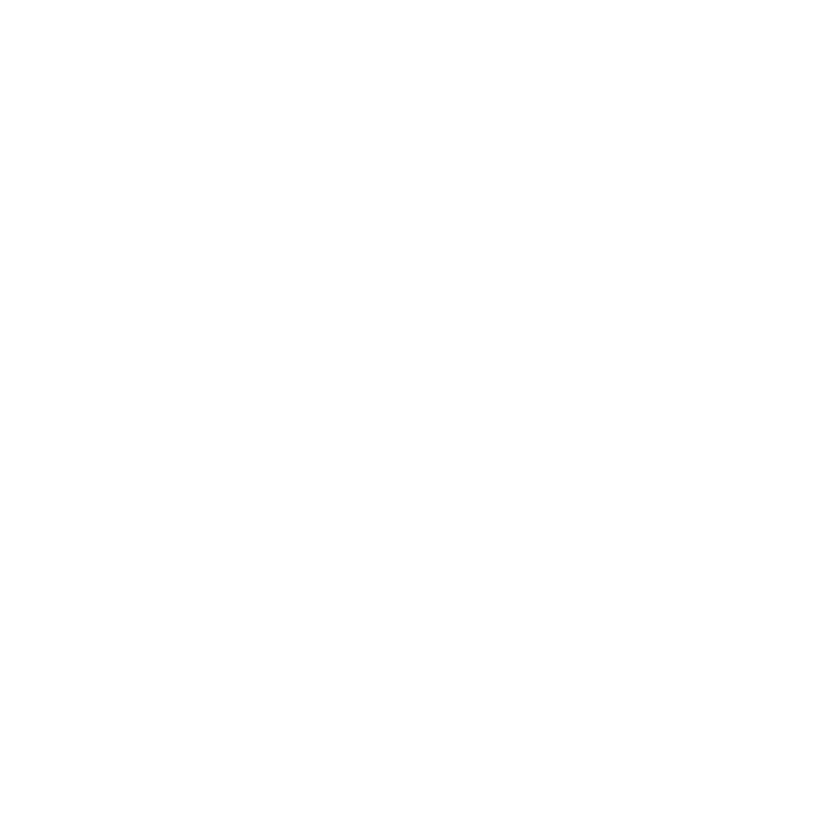

In [50]:
# Load necessary libraries
install.packages(c("corrplot", "dendextend", "factoextra"))
library(corrplot)
library(dendextend)
library(factoextra)

# Calculate the correlation matrix
cor_matrix <- cor(sub_tmp_gtex1_Z)

# Visualize the correlation matrix
corrplot(cor_matrix, method = "color", title = "Correlation Matrix of LVs")

# Hierarchical clustering
dist_matrix <- as.dist(1 - cor_matrix)  # Using distance = 1 - correlation
hc <- hclust(dist_matrix)

# Plot the dendrogram
plot(hc, main = "Hierarchical Clustering of LVs", sub = "", xlab = "", ylab = "Height",
     labels = paste("LV", 1:ncol(data), sep = ""), cex.lab = 1.2, cex.axis = 0.9, cex.main = 1.5)

# Optionally, cut the dendrogram to form clusters and highlight them
clusters <- cutree(hc, k = 5)  # 'k' is the number of clusters you want
rect.hclust(hc, k = 5, border = "red")  # Add red borders to the clusters

# Enhanced visualization using factoextra
fviz_dend(hc, rect = TRUE, rect_fill = TRUE, labels = paste("LV", 1:ncol(data), sep = ""))


Principal Component Analysis (PCA) for Dimensionality Reduction

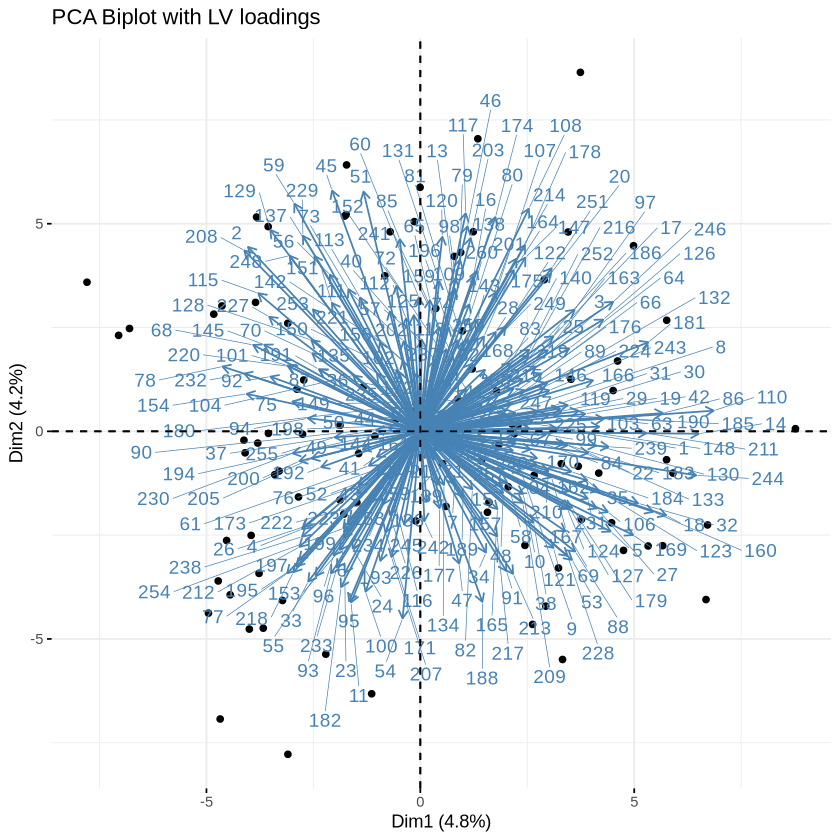

In [63]:
library(factoextra)
pca_result <- prcomp(sub_tmp_gtex1_Z, scale. = TRUE)
fviz_pca_biplot(pca_result, label = "var", repel = TRUE,
                title = "PCA Biplot with LV loadings")

t-Distributed Stochastic Neighbor Embedding (t-SNE)

Performing PCA
Read the 100 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.15 seconds (sparsity = 0.979800)!
Learning embedding...
Iteration 50: error is 55.138645 (50 iterations in 0.24 seconds)
Iteration 100: error is 58.610518 (50 iterations in 0.25 seconds)
Iteration 150: error is 60.196459 (50 iterations in 0.25 seconds)
Iteration 200: error is 57.037494 (50 iterations in 0.29 seconds)
Iteration 250: error is 57.562116 (50 iterations in 0.30 seconds)
Iteration 300: error is 1.475994 (50 iterations in 0.19 seconds)
Iteration 350: error is 1.107686 (50 iterations in 0.15 seconds)
Iteration 400: error is 0.676667 (50 iterations in 0.16 seconds)
Iteration 450: error is 0.454024 (50 iterations in 0.05 seconds)
Iteration 500: error is 0.390030 (50 iterations in 0.00 seconds)
Iteration 550: error is 0.344992 (50 iterations in 0.00 seconds)
Iteration 600

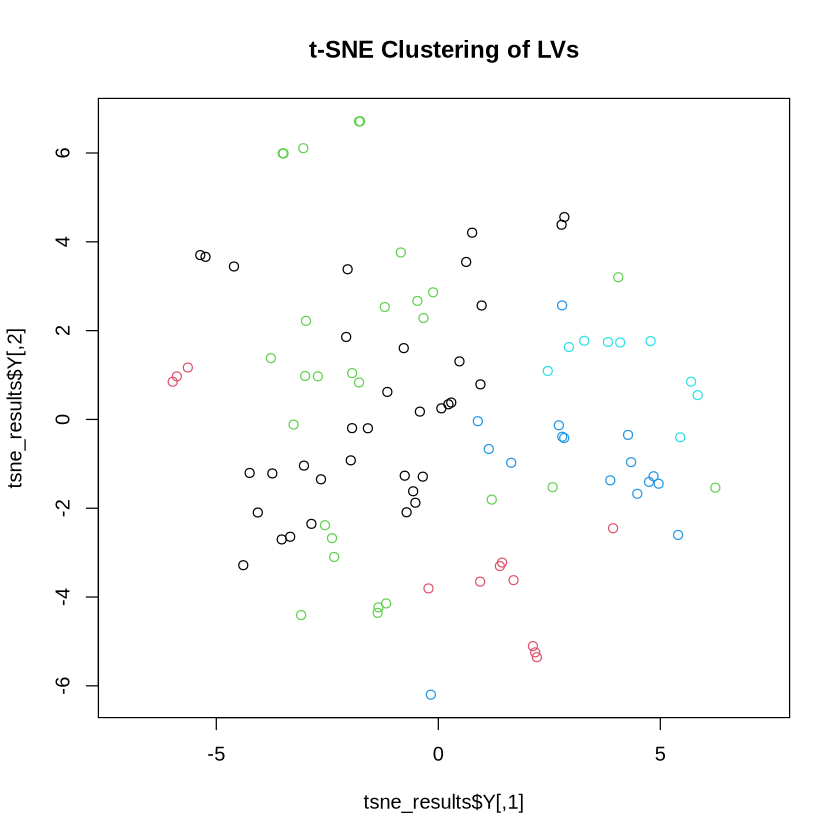

In [56]:
library(Rtsne)
tsne_results <- Rtsne(sub_tmp_gtex1_Z,  dims = 2, perplexity = 30, verbose = TRUE)
plot(tsne_results$Y, col = clusters, asp = 1, main = "t-SNE Clustering of LVs")

K-Means Clustering on PCA/t-SNE Results

In [64]:
set.seed(123)
kmeans_result <- kmeans(tsne_results$Y, centers = 5)
fviz_cluster(kmeans_result, data = tsne_results$Y)

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric


Autoencoders for Non-linear Dimensionality Reduction

In [72]:
install.packages("keras")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [73]:
library(keras)

# Prepare your data
data <- as.matrix(sub_tmp_gtex1_Z) # Ensure data is a matrix

# Initialize the model
model <- keras_model_sequential()

# Add layers
model$add(layer_dense(units = 50, activation = 'relu', input_shape = c(ncol(data))))
model$add(layer_dense(units = 2, activation = 'relu'))
model$add(layer_dense(units = 50, activation = 'relu'))
model$add(layer_dense(units = ncol(data), activation = 'sigmoid'))

# Compile the model
model %>% compile(
  loss = 'mean_squared_error',
  optimizer = optimizer_rmsprop()
)

# Fit the model
history <- model %>% fit(data, data, epochs = 100, batch_size = 256, validation_split = 0.2)

# Check the model structure
summary(model)

ERROR: Error in UseMethod("compile"): no applicable method for 'compile' applied to an object of class "c('keras.models.sequential.Sequential', 'keras.models.model.Model', 'keras.backend.tensorflow.trainer.TensorFlowTrainer', 'keras.trainers.trainer.Trainer', 'keras.layers.layer.Layer', 'keras.backend.tensorflow.layer.TFLayer', 'keras.backend.tensorflow.trackable.KerasAutoTrackable', 'tensorflow.python.trackable.autotrackable.AutoTrackable', 'tensorflow.python.trackable.base.Trackable', 'keras.ops.operation.Operation', 'python.builtin.object')"


In [13]:
top_genes_n=round(nrow(tmp_gtex1$Z)*0.01, 0)

In [14]:
data.frame(tmp_gtex1$Z)[c('X1')] %>%
dplyr::arrange(desc(X1)) %>%
slice(1:top_genes_n)

X1       
SEMG1     6.7922050
ENPP3     3.4925172
GATA2     2.0265979
POU5F1    1.4488403
PTGS2     1.1278418
PLA1A     1.0134807
AMD1      0.9796538
MUC6      0.8778001
CDK19     0.8747053
TBC1D8    0.7742922
PLA2G4A   0.6700143
DUSP2     0.6588073
ZNF613    0.6265809
CHEK1     0.6135956
UPK3A     0.6118177
UNC5B     0.6012079
SGK1      0.5393649
PTGES     0.5339138
CYSLTR2   0.5327914
SLC15A2   0.5291071
NEDD4L    0.5119418
SLC2A9    0.4981786
CYP1B1    0.4935097
KIF22     0.4865154
CD38      0.4777770
KLHL14    0.4751343
NKX3-1    0.4718048
ABCG2     0.4561600
ZNF350    0.4361138
GGT1      0.4359474
⋮         ⋮        
ARHGAP6   0.3561390
ID3       0.3389561
ELOVL5    0.3386576
MRPS26    0.3368508
VIPR2     0.3278621
TRPV6     0.3266740
KL        0.3210811
SORD      0.3125647
HPGDS     0.3088216
NEU3      0.3070169
ALAD      0.3058229
KCNN4     0.2902790
PEX2      0.2893818
SLCO4C1   0.2884615
SPINK2    0.2853190
TNFRSF11A 0.2832984
CKB       0.2784992
FADS2     0.2748741
KCNG1     0.2742675
ANAPC4    0.2724235
MCF2      0.2714758
UQCRQ     0.2694412
MALT1     0.2689590
ATP2C2    0.2612943
CANT1     0.2589552
SOCS2     0.2576579
EAF2      0.2574774
APOBEC3G  0.2562248
NEFH      0.2522900
SCNN1A    0.2458695

In [15]:
# Assuming tmp_gtex1$Z and tmp_gtex2$Z are matrices
tmp_z1=tmp_gtex1$Z
tmp_z2=tmp_gtex2$Z

top_genes_n1 <- round(nrow(tmp_z1) * 0.01, 0)
top_genes_n2 <- round(nrow(tmp_z2) * 0.01, 0)

top_genes_n=min(top_genes_n1, top_genes_n2)

i=1

top_genes_comp_1 = data.frame(tmp_z1[, i]) %>%
                    magrittr::set_colnames('loadings') %>%
                    dplyr::arrange(desc(loadings)) %>%
                    dplyr::slice(1:top_genes_n) %>%
                    tibble::rownames_to_column(var = "row_names") %>% 
                    dplyr::select(row_names) %>% 
                    dplyr::pull()

top_genes_comp_2 = data.frame(tmp_z2[, i]) %>%
                    magrittr::set_colnames('loadings') %>%
                    dplyr::arrange(desc(loadings)) %>%
                    dplyr::slice(1:top_genes_n) %>%
                    tibble::rownames_to_column(var = "row_names") %>% 
                    dplyr::select(row_names) %>% 
                    dplyr::pull()

top_genes_comp_1
top_genes_comp_2

per_comm <- (length(intersect(top_genes_comp_1, top_genes_comp_2)) / length(top_genes_comp_1)) * 100
per_comm


[1] "SEMG1"     "ENPP3"     "GATA2"     "POU5F1"    "PTGS2"     "PLA1A"    
 [7] "AMD1"      "MUC6"      "CDK19"     "TBC1D8"    "PLA2G4A"   "DUSP2"    
[13] "ZNF613"    "CHEK1"     "UPK3A"     "UNC5B"     "SGK1"      "PTGES"    
[19] "CYSLTR2"   "SLC15A2"   "NEDD4L"    "SLC2A9"    "CYP1B1"    "KIF22"    
[25] "CD38"      "KLHL14"    "NKX3-1"    "ABCG2"     "ZNF350"    "GGT1"     
[31] "ID1"       "ENPP5"     "DUSP4"     "DPP4"      "CENPN"     "ELK4"     
[37] "SLC36A1"   "ARHGAP6"   "ID3"       "ELOVL5"    "MRPS26"    "VIPR2"    
[43] "TRPV6"     "KL"        "SORD"      "HPGDS"     "NEU3"      "ALAD"     
[49] "KCNN4"     "PEX2"      "SLCO4C1"   "SPINK2"    "TNFRSF11A" "CKB"      
[55] "FADS2"     "KCNG1"     "ANAPC4"    "MCF2"      "UQCRQ"     "MALT1"    
[61] "ATP2C2"    "CANT1"     "SOCS2"     "EAF2"      "APOBEC3G"  "NEFH"     
[67] "SCNN1A"

[1] "ANKRD55"   "PPBP"      "HIST1H4D"  "FCGR3B"    "QPCT"      "TLR9"     
 [7] "LPAR2"     "VNN1"      "TMEM140"   "SELL"      "HIST1H2BK" "NLRP3"    
[13] "LYL1"      "BST1"      "PADI4"     "KCNE1"     "CAMP"      "PF4"      
[19] "CLEC1B"    "ARHGAP9"   "ITGAM"     "HPSE"      "CEACAM3"   "MANSC1"   
[25] "ABCA7"     "SLC24A4"   "HIST1H4I"  "KLF1"      "F5"        "OXER1"    
[31] "AIM2"      "PILRA"     "MNDA"      "TRIM21"    "NCF1C"     "NCF1"     
[37] "NTNG2"     "OR2B6"     "LILRA2"    "GYPC"      "ST20"      "UBB"      
[43] "LTA4H"     "STX10"     "FCAR"      "HRH4"      "KCNE3"     "VNN2"     
[49] "CLDN9"     "FFAR2"     "EXTL3"     "CDA"       "GBA"       "CXCR1"    
[55] "UBE2F"     "ALAS2"     "CNPY3"     "BCL2A1"    "SIRT7"     "CREB5"    
[61] "KCNJ15"    "OASL"      "PPT1"      "OR52K1"    "TLR5"      "KREMEN1"  
[67] "CASP1"

[1] 0

In [16]:
# Function to get top genes for a given column (component)
get_top_genes <- function(matrix, col_index, top_n) {
  loadings <- matrix[, col_index]
  names(loadings) <- rownames(matrix)
  top_genes <- sort(loadings, decreasing = TRUE)[1:top_n]
  names(top_genes)
}

# Function to compare two components and calculate the percentage of common genes
compare_components <- function(matrix1, matrix2, col_index1, col_index2, top_n) {
  top_genes1 <- get_top_genes(matrix1, col_index1, top_n)
  top_genes2 <- get_top_genes(matrix2, col_index2, top_n)
  percent_common <- (length(intersect(top_genes1, top_genes2)) / top_n) * 100
  percent_common
}

# Main function to generate comparisons for all pairs of components
generate_comparisons <- function(matrix1, matrix2) {
  top_genes_n1 <- round(nrow(matrix1) * 0.01, 0)
  top_genes_n2 <- round(nrow(matrix2) * 0.01, 0)
  top_genes_n <- min(top_genes_n1, top_genes_n2)
  
  matrix1_name <- deparse(substitute(matrix1))
  matrix2_name <- deparse(substitute(matrix2))
  
  comparisons <- expand.grid(LV1 = paste0(matrix1_name, '_LV', 1:ncol(matrix1)),
                             LV2 = paste0(matrix2_name, '_LV', 1:ncol(matrix2)))
  
  comparison_results <- mapply(FUN = function(lv1, lv2) {
    col_index1 <- as.numeric(gsub(".*_LV", "", lv1))
    col_index2 <- as.numeric(gsub(".*_LV", "", lv2))
    compare_components(matrix1, matrix2, col_index1, col_index2, top_genes_n)
  }, comparisons$LV1, comparisons$LV2)
  
  comparisons$Comparison <- paste(comparisons$LV1, comparisons$LV2, sep=" vs ")
  comparisons$Percent_Common <- comparison_results
  result_df <- comparisons[, c("Comparison", "Percent_Common")]
  
  result_df
}

# Usage example
tmp_gtex1$Z and tmp_gtex2$Z are your matrices
comparison_df <- generate_comparisons(tmp_gtex1$Z, tmp_gtex2$Z)
print(comparison_df)


ERROR: Error in parse(text = x, srcfile = src): <text>:43:13: unexpected symbol
42: # Usage example
43: tmp_gtex1$Z and
                ^


In [ ]:
library(dplyr)
library(tidyr)

tmp_gtex1_rownamesB=data.frame(rownames(tmp_gtex1$B))
colnames(tmp_gtex1_rownamesB)='LV'
tmp_gtex1_rownamesB=data.frame(stringr::str_split_fixed(tmp_gtex1_rownamesB$LV, ',', 2))
colnames(tmp_gtex1_rownamesB)=c('LV', 'PATHWAY')

tmp_gtex1_rownamesB = tmp_gtex1_rownamesB %>%
  mutate(
    LV = gsub("LV ", "LV", LV),  
    LV = if_else(grepl("^[0-9]+$", LV), paste0("LV", LV), LV),
    PATHWAY = if_else(PATHWAY == "", NA, PATHWAY)
  ) %>% 
  na.omit()

colnames(tmp_gtex1_rownamesB)=c('LV_tmp_gtex1', 'PATHWAY')
#

tmp_gtex2_rownamesB=data.frame(rownames(tmp_gtex2$B))
colnames(tmp_gtex2_rownamesB)='LV'
tmp_gtex2_rownamesB=data.frame(stringr::str_split_fixed(tmp_gtex2_rownamesB$LV, ',', 2))
colnames(tmp_gtex2_rownamesB)=c('LV', 'PATHWAY')

tmp_gtex2_rownamesB = tmp_gtex2_rownamesB %>%
  mutate(
    LV = gsub("LV ", "LV", LV),  
    LV = if_else(grepl("^[0-9]+$", LV), paste0("LV", LV), LV),
    PATHWAY = if_else(PATHWAY == "", NA, PATHWAY)
  ) %>% 
  na.omit()

colnames(tmp_gtex2_rownamesB)=c('LV_tmp_gtex2', 'PATHWAY')

In [ ]:
lv_path_related=inner_join(tmp_gtex1_rownamesB, tmp_gtex2_rownamesB, relationship = "many-to-many")
head(lv_path_related)

In [ ]:
# Assuming tmp_gtex1$Z and tmp_gtex2$Z are your matrices

# Function to get top genes for a given column (component)
get_top_genes <- function(matrix, col_index, top_n) {
  loadings <- matrix[, col_index]
  names(loadings) <- rownames(matrix)
  top_genes <- sort(loadings, decreasing = TRUE)[1:top_n]
  names(top_genes)
}

# Function to compare two components and calculate the percentage of common genes
compare_components <- function(matrix1, matrix2, col_index1, col_index2, top_n) {
  top_genes1 <- get_top_genes(matrix1, col_index1, top_n)
  top_genes2 <- get_top_genes(matrix2, col_index2, top_n)
  percent_common <- (length(intersect(top_genes1, top_genes2)) / top_n) * 100
  percent_common
}

# Main function to generate comparisons for all pairs of components
generate_comparisons <- function(matrix1, matrix2) {
  top_genes_n1 <- round(nrow(matrix1) * 0.01, 0)
  top_genes_n2 <- round(nrow(matrix2) * 0.01, 0)
  top_genes_n <- min(top_genes_n1, top_genes_n2)
  
  comparisons <- expand.grid(LV1 = paste0('LV', 1:ncol(matrix1)),
                             LV2 = paste0('LV', 1:ncol(matrix2)))
  
  comparison_results <- mapply(FUN = function(lv1, lv2) {
    col_index1 <- as.numeric(gsub("LV", "", lv1))
    col_index2 <- as.numeric(gsub("LV", "", lv2))
    compare_components(matrix1, matrix2, col_index1, col_index2, top_genes_n)
  }, comparisons$LV1, comparisons$LV2)
  
  comparisons$Percent_Common <- comparison_results
  comparisons
}

# Example usage
tmp_z1=tmp_gtex1$Z
tmp_z2=tmp_gtex2$Z

comparison_df <- generate_comparisons(tmp_z1, tmp_z2)


In [19]:
# Function to get top genes for a given column (component)
get_top_genes <- function(matrix, col_index, top_n) {
  loadings <- matrix[, col_index]
  names(loadings) <- rownames(matrix)
  top_genes <- sort(loadings, decreasing = TRUE)[1:top_n]
  names(top_genes)
}

# Function to compare two components and calculate the percentage of common genes
compare_components <- function(matrix1, matrix2, col_index1, col_index2, top_n) {
  top_genes1 <- get_top_genes(matrix1, col_index1, top_n)
  top_genes2 <- get_top_genes(matrix2, col_index2, top_n)
  percent_common <- (length(intersect(top_genes1, top_genes2)) / top_n) * 100
  percent_common
}

# Main function to generate comparisons for all pairs of components
generate_comparisons <- function(matrix1, matrix2) {
  top_genes_n1 <- round(nrow(matrix1) * 0.01, 0)
  top_genes_n2 <- round(nrow(matrix2) * 0.01, 0)
  top_genes_n <- min(top_genes_n1, top_genes_n2)
  
  matrix1_name <- deparse(substitute(matrix1))
  matrix2_name <- deparse(substitute(matrix2))
  
  comparisons <- expand.grid(LV1 = paste0(matrix1_name, '_LV', 1:ncol(matrix1)),
                             LV2 = paste0(matrix2_name, '_LV', 1:ncol(matrix2)))
  
  comparison_results <- mapply(FUN = function(lv1, lv2) {
    col_index1 <- as.numeric(gsub(".*_LV", "", lv1))
    col_index2 <- as.numeric(gsub(".*_LV", "", lv2))
    compare_components(matrix1, matrix2, col_index1, col_index2, top_genes_n)
  }, comparisons$LV1, comparisons$LV2)
  
  comparisons$Comparison <- paste(comparisons$LV1, comparisons$LV2, sep=" vs ")
  comparisons$Percent_Common <- comparison_results
  result_df <- comparisons[, c("Comparison", "Percent_Common")]
  
  result_df
}

# Usage example
tmp_z1=tmp_gtex1$Z
tmp_z2=tmp_gtex2$Z
comparison_df <- generate_comparisons(tmp_z1, tmp_z2)


In [20]:
comparison_df <- comparison_df %>%
  separate(Comparison, into = c("z1", "z2"), sep = " vs ") %>%
  mutate(z1 = lapply(z1, function(x) unlist(strsplit(x, '_'))[3]),
         z2 = lapply(z2, function(x) unlist(strsplit(x, '_'))[3]))

In [21]:
options(repr.plot.width = 30, repr.plot.height = 30, repr.plot.res = 250)

# Assuming each list element contains only one item you can use:
comparison_df$z1 <- as.character(sapply(comparison_df$z1, `[`, 1))
comparison_df$z2 <- as.character(sapply(comparison_df$z2, `[`, 1))

# If the lists are uniform and just need flattening:
comparison_df$z1 <- unlist(comparison_df$z1)
comparison_df$z2 <- unlist(comparison_df$z2)

# Convert to factor after simplification
comparison_df$z1 <- as.factor(comparison_df$z1)
comparison_df$z2 <- as.factor(comparison_df$z2)

# Create the heatmap
ggplot(comparison_df, aes(x = z1, y = z2, fill = Percent_Common)) +
  geom_tile() +  # This adds the tiles for the heatmap
  scale_fill_gradient(low = "white", high = "red") +  # Colors for the gradient of fill
  theme_minimal() +  # Minimalist theme
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  # Rotate x axis texts
  labs(fill = "Percent Common", x = "", y = "", title = "Heatmap of Percent Common")  # Labels


In [26]:
z1_80=comparison_df$z1[comparison_df$Percent_Common>80]
z2_80=comparison_df$z2[comparison_df$Percent_Common>80]

shared_lvs=comparison_df %>%
dplyr::filter(z1 %in% z1_80 | z2 %in% z2_80)

In [27]:
options(repr.plot.width = 35, repr.plot.height = 50, repr.plot.res = 250)

ggplot(shared_lvs, aes(x = z1, y = z2, fill = Percent_Common)) +
  geom_tile() +  
  scale_fill_gradient(low = "white", high = "red") +  
  theme_minimal() +  # Minimalist theme
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +  
  labs(fill = "Percent Common", x = "", y = "", title = "Heatmap of Percent Common")  +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
   panel.background = element_blank(), axis.line = element_line(colour = "black"))

K-Means Clustering: Simplifies large datasets by grouping data into a fixed number of clusters based on mean distances.

Hierarchical Clustering: Builds a tree of clusters and explores data relationships at different scales.

DBSCAN: Identifies clusters based on local density cues, useful for handling outliers and varying cluster shapes.

t-SNE: Excels in visualizing complex, high-dimensional data by mapping it into a lower-dimensional space.

PCA: Reduces dimensions while preserving variance, often used to simplify data before clustering.